In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv


In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [8]:
df.drop(columns=['RowNumber','Surname','CustomerId'],inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [10]:
cat_cols=['Geography','Gender','Card Type']

In [12]:
from sklearn.preprocessing import OrdinalEncoder

In [13]:
enc=OrdinalEncoder()
df[cat_cols]=enc.fit_transform(df[cat_cols])

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0.0,0.0,42,2,0.00,1,1,1,101348.88,1,1,2,0.0,464
1,608,2.0,0.0,41,1,83807.86,1,0,1,112542.58,0,1,3,0.0,456
2,502,0.0,0.0,42,8,159660.80,3,1,0,113931.57,1,1,3,0.0,377
3,699,0.0,0.0,39,1,0.00,2,0,0,93826.63,0,0,5,1.0,350
4,850,2.0,0.0,43,2,125510.82,1,1,1,79084.10,0,0,5,1.0,425


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(df.drop("Exited",axis=1),df["Exited"],test_size=0.2,random_state=42)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler=MinMaxScaler()
Scaled_X_train=scaler.fit_transform(X_train)
Scaled_X_test=scaler.fit_transform(X_test)

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [35]:
model=Sequential([
    Dense(units=16,input_shape=(14,),activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=2,activation='sigmoid')
])

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                240       
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 2)                 66        
                                                                 
Total params: 850
Trainable params: 850
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer=Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['Accuracy'])

In [44]:
history=model.fit(x=Scaled_X_train,y=y_train,validation_split=0.3,batch_size=100,epochs=30)

Epoch 1/30
56/56 [==============================] - 0s 5ms/step - loss: 0.0038 - Accuracy: 0.9986 - val_loss: 0.0043 - val_Accuracy: 0.9987
Epoch 2/30
56/56 [==============================] - 0s 3ms/step - loss: 0.0034 - Accuracy: 0.9986 - val_loss: 0.0061 - val_Accuracy: 0.9987
Epoch 3/30
56/56 [==============================] - 0s 4ms/step - loss: 0.0031 - Accuracy: 0.9986 - val_loss: 0.0069 - val_Accuracy: 0.9987
Epoch 4/30
56/56 [==============================] - 0s 3ms/step - loss: 0.0049 - Accuracy: 0.9984 - val_loss: 0.0083 - val_Accuracy: 0.9987
Epoch 5/30
56/56 [==============================] - 0s 3ms/step - loss: 0.0042 - Accuracy: 0.9986 - val_loss: 0.0095 - val_Accuracy: 0.9962
Epoch 6/30
56/56 [==============================] - 0s 3ms/step - loss: 0.0040 - Accuracy: 0.9986 - val_loss: 0.0074 - val_Accuracy: 0.9975
Epoch 7/30
56/56 [==============================] - 0s 3ms/step - loss: 0.0026 - Accuracy: 0.9991 - val_loss: 0.0062 - val_Accuracy: 0.9983
Epoch 8/30
56/56 [==

In [45]:
predictions=model.predict(x=Scaled_X_test,batch_size=100)

20/20 [==============================] - 0s 2ms/step


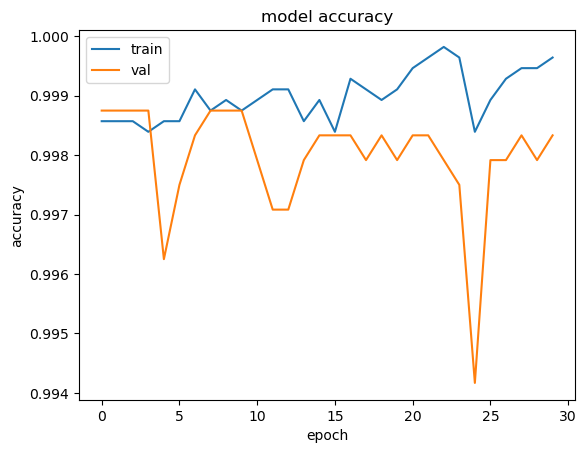

In [46]:
from matplotlib import pyplot as plt
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

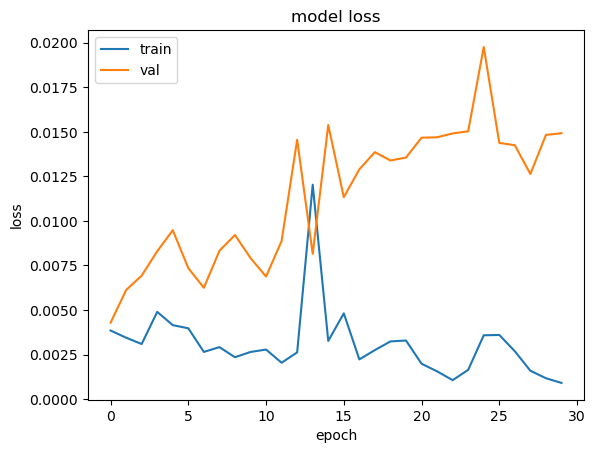

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [51]:
model1=Sequential([
    Dense(units=16,input_shape=(14,),activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dense(units=32,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dense(units=2,activation='sigmoid')
])

In [52]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                240       
                                                                 
 dense_13 (Dense)            (None, 32)                544       
                                                                 
 dense_14 (Dense)            (None, 2)                 66        
                                                                 
Total params: 850
Trainable params: 850
Non-trainable params: 0
_________________________________________________________________


In [53]:
model1.compile(optimizer=Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['Accuracy'])

In [55]:
history1=model1.fit(x=Scaled_X_train,y=y_train,validation_split=0.3,batch_size=100,epochs=30)

Epoch 1/30
56/56 [==============================] - 1s 6ms/step - loss: 0.2064 - Accuracy: 0.9182 - val_loss: 0.0456 - val_Accuracy: 0.9983
Epoch 2/30
56/56 [==============================] - 0s 3ms/step - loss: 0.0375 - Accuracy: 0.9984 - val_loss: 0.0348 - val_Accuracy: 0.9983
Epoch 3/30
56/56 [==============================] - 0s 3ms/step - loss: 0.0293 - Accuracy: 0.9986 - val_loss: 0.0283 - val_Accuracy: 0.9983
Epoch 4/30
56/56 [==============================] - 0s 3ms/step - loss: 0.0254 - Accuracy: 0.9986 - val_loss: 0.0253 - val_Accuracy: 0.9983
Epoch 5/30
56/56 [==============================] - 0s 3ms/step - loss: 0.0218 - Accuracy: 0.9986 - val_loss: 0.0239 - val_Accuracy: 0.9983
Epoch 6/30
56/56 [==============================] - 0s 3ms/step - loss: 0.0199 - Accuracy: 0.9984 - val_loss: 0.0228 - val_Accuracy: 0.9983
Epoch 7/30
56/56 [==============================] - 0s 3ms/step - loss: 0.0188 - Accuracy: 0.9986 - val_loss: 0.0204 - val_Accuracy: 0.9983
Epoch 8/30
56/56 [==

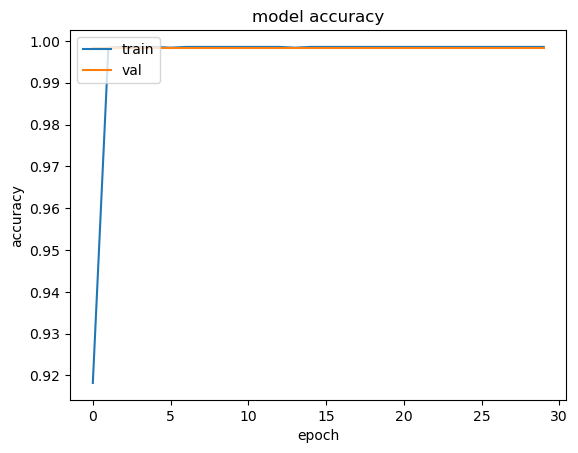

In [57]:
plt.plot(history1.history['Accuracy'])
plt.plot(history1.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

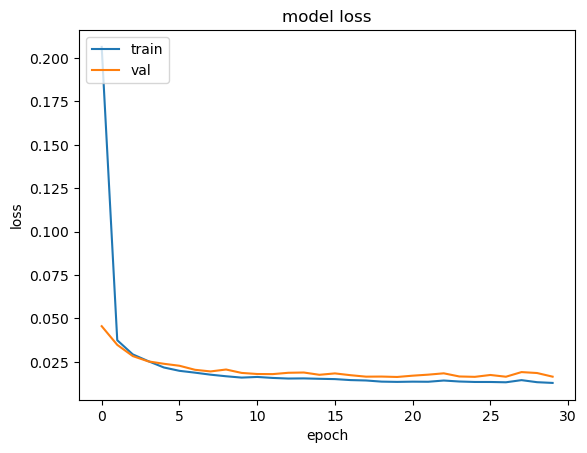

In [58]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [60]:
predct=model1.predict(x=Scaled_X_test,batch_size=100)

20/20 [==============================] - 0s 1ms/step


In [64]:
rounded_predictions=np.argmax(predct,axis=-1)

In [61]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools

In [65]:
cm=confusion_matrix(y_true=y_test,y_pred=rounded_predictions)

In [66]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('confusion matrix without normalization')
    print(cm)
    fig, ax=plt.subplots()
    im=ax.imshow(cm,interpolation='nearest',cmap=cmap)
    ax.figure.colorbar(im,ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
          yticks=np.arange(cm.shape[0]),
          xticklabels=classes,yticklabels=classes,
          title=title,
          ylabel='True label',
          xlabel='Predicted label')

confusion matrix without normalization
[[1606    1]
 [   1  392]]


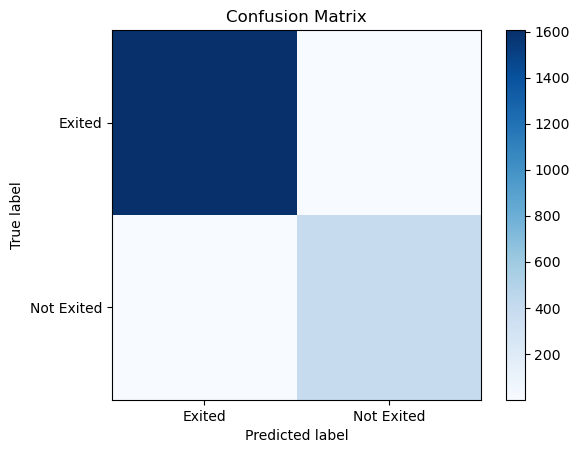

In [67]:
cm_plot_labels=['Exited','Not Exited']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels)